# RNA seq fun with pandas
## Replicate analysis

This is my development sheet likely not of this will be in the final analysis/code.

In [8]:
#first try at stat test on the two analyses
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind


df = pd.read_csv("Galaxy210.tabular",sep='\t',header=(0))

df = df.rename(columns = {df.columns[1] : "smtav4_histat2", df.columns[2] : "smtav6_histat2", df.columns[3] :"smtav7_histat2" , df.columns[4] : "smtav4_rnastar2", df.columns[5] : "smtav6_rnastar", df.columns[6] : "smtav7_rnastar"})


df['sum'] = df[df.columns[1]] + df[df.columns[1]]
print(type(df.columns[1]))
df

<class 'str'>


,Geneid,smtav4_histat2,smtav6_histat2,smtav7_histat2,smtav4_rnastar2,smtav6_rnastar,smtav7_rnastar,sum
0,1915,385958,337936,307710,387941,335829,310553,771916
1,2512,161098,130481,127085,164265,131694,128873,322196
2,4512,140247,143531,165329,139396,142947,164257,280494
3,6132,122392,94336,87914,142497,108488,101415,244784
4,2597,112404,89925,82727,116335,91732,84703,224808
...,...,...,...,...,...,...,...,...
28390,9947,0,0,0,0,0,0,0
28391,9951,0,0,1,0,0,1,0
28392,9956,0,0,0,0,0,0,0
28393,9963,0,7,3,0,7,3,0


In [13]:
#second try at stat test on the two analyses
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind


df = pd.read_csv("Galaxy210.tabular",sep='\t',header=(0))

df = df.rename(columns = {df.columns[1] : "smtav4_histat2", df.columns[2] : "smtav6_histat2", df.columns[3] :"smtav7_histat2" , df.columns[4] : "smtav4_rnastar2", df.columns[5] : "smtav6_rnastar", df.columns[6] : "smtav7_rnastar"})

#for gene in range(len(df))
#    method_1 = (iloc )

method_1 = df.loc[2,:].values.flatten().tolist()
method_2 = method_1[4:]
method_1 = method_1[1:4]
ttest_ind(method_1, method_2)
#print(method_2)

#df

Ttest_indResult(statistic=0.07559165656449363, pvalue=0.9433736468389192)

In [67]:
#third attempt
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind


df = pd.read_csv("Galaxy210.tabular",sep='\t',header=(0))

df = df.rename(columns = {df.columns[1] : "smtav4_histat2", df.columns[2] : "smtav6_histat2", df.columns[3] :"smtav7_histat2" , df.columns[4] : "smtav4_rnastar2", df.columns[5] : "smtav6_rnastar", df.columns[6] : "smtav7_rnastar"})

results = []
for gene in range(5):
    #testresult = list(testresult)
    #testresult = []
    method_1 = df.loc[gene,:].values.flatten().tolist()
    method_2 = method_1[4:7]
    method_1 = method_1[1:4]
    ttest_result = ttest_ind(method_1, method_2)
    print(testresult)
    df.loc[gene,7] = ttest_result[0]
    df.loc[gene,8] = ttest_result[1]
    #print(f'{ttest_result[0]}, {ttest_result[1]}')
    df.loc[gene,"new"] = gene
    #results.append((ttest_result[0], ttest_result[1]))
    
#stat_frame = pd.DataFrame(results, columns=[ "statistics", "pvalue"])
#print(stat_frame.head(10))
print(df.head(10))
#print(stat_frame.tail(10))


Ttest_indResult(statistic=-0.1961529864126995, pvalue=0.8540527184085475)
Ttest_indResult(statistic=-0.1961529864126995, pvalue=0.8540527184085475)
Ttest_indResult(statistic=-0.1961529864126995, pvalue=0.8540527184085475)
Ttest_indResult(statistic=-0.1961529864126995, pvalue=0.8540527184085475)
Ttest_indResult(statistic=-0.1961529864126995, pvalue=0.8540527184085475)
   Geneid  smtav4_histat2  smtav6_histat2  smtav7_histat2  smtav4_rnastar2  \
0    1915          385958          337936          307710           387941   
1    2512          161098          130481          127085           164265   
2    4512          140247          143531          165329           139396   
3    6132          122392           94336           87914           142497   
4    2597          112404           89925           82727           116335   
5    6187          103632           83822           80453           117359   
6    4550          103230          108641          121404           103494   
7    4

In [76]:
#third attempt
# runtime warning are due to zero values and simlar vales not a problem here!
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind


df = pd.read_csv("Galaxy210.tabular",sep='\t',header=(0))

df = df.rename(columns = {df.columns[1] : "smtav4_histat2", df.columns[2] : "smtav6_histat2", df.columns[3] :"smtav7_histat2" , df.columns[4] : "smtav4_rnastar2", df.columns[5] : "smtav6_rnastar", df.columns[6] : "smtav7_rnastar"})

results = []
for gene in range(len(df)):
    method_1 = df.loc[gene,:].values.flatten().tolist()
    method_2 = method_1[4:7]
    method_1 = method_1[1:4]
    ttest_result = ttest_ind(method_1, method_2)
    df.loc[gene,7] = ttest_result[0]
    df.loc[gene,8] = ttest_result[1]
  
df = df.rename(columns = {df.columns[7] : "ttest_ind_stat", df.columns[8] : "ttest_ind_p_value"})

print(df.head(10))
print(df.tail(10))



C:\Users\hwbst6\AppData\Local\Temp\ipykernel_20992\1463760647.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest_result = ttest_ind(method_1, method_2)


   Geneid  smtav4_histat2  smtav6_histat2  smtav7_histat2  smtav4_rnastar2  \
0    1915          385958          337936          307710           387941   
1    2512          161098          130481          127085           164265   
2    4512          140247          143531          165329           139396   
3    6132          122392           94336           87914           142497   
4    2597          112404           89925           82727           116335   
5    6187          103632           83822           80453           117359   
6    4550          103230          108641          121404           103494   
7    4514           98558           87495          100806            97797   
8    1938           94412           85570           81757            95661   
9   23521           90219           76580           70611           105763   

   smtav6_rnastar  smtav7_rnastar  ttest_ind_stat  ttest_ind_p_value  
0          335829          310553       -0.028130           0.978906  

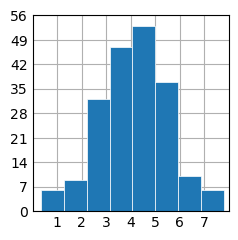

In [77]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

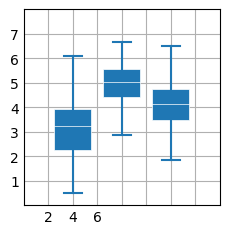

In [78]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(10)
D = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3))

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, positions=[2, 4, 6], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()


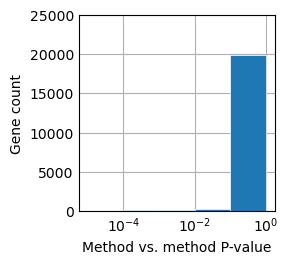

In [127]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data

x = df["ttest_ind_p_value"]

# plot:
fig, ax = plt.subplots()
plt.xscale('log')
ax.hist(x, bins = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1], linewidth=0.5, edgecolor="white")

ax.set(ylim = (0, 25000), yticks=np.linspace(0, 25000, 6))
ax.set_xlabel("Method vs. method P-value")
ax.set_ylabel("Gene count")
plt.show()

bins:  [0.0001, 0.001, 0.01, 0.1, 1]


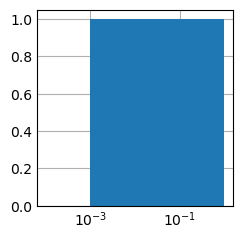

In [110]:
import matplotlib.pyplot as plt
import numpy as np

data = [0.1, 0.01, 0.001 ]
#bins = 10**(np.arange(0,-4))
bins = [0.0001, 0.001, 0.01, 0.1, 1]
print("bins: ", bins)
plt.xscale('log')
plt.hist(data,bins=bins) 


plt.show()